In [1]:
import sys
sys.path

['D:\\bio\\jupyter_code\\BRCA',
 'D:\\anaconda\\envs\\STalign\\python310.zip',
 'D:\\anaconda\\envs\\STalign\\DLLs',
 'D:\\anaconda\\envs\\STalign\\lib',
 'D:\\anaconda\\envs\\STalign',
 '',
 'C:\\Users\\23147\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'D:\\anaconda\\envs\\STalign\\lib\\site-packages',
 'D:\\anaconda\\envs\\STalign\\lib\\site-packages\\win32',
 'D:\\anaconda\\envs\\STalign\\lib\\site-packages\\win32\\lib',
 'D:\\anaconda\\envs\\STalign\\lib\\site-packages\\Pythonwin']

In [2]:
# import dependencies
import sys
import numpy as np
import pandas as pd
import scanpy as sc

import os
print(os.getcwd())#显示当前路径
os.chdir('D:/bio/STalign/STalign-main')#更改路径，''里面为更改的路径
print(os.getcwd())#显示当前路径

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)  # make plots bigger

import torch
if torch.cuda.is_available():
    print('cuda is available')
    torch.set_default_device('cuda:0')
else:
    torch.set_default_device('cpu')
# import STalign after pip install
from STalign import STalign

D:\bio\jupyter_code\BRCA
D:\bio\STalign\STalign-main
cuda is available


In [3]:
# param
input_dir = 'G:/dataset/3_BRCA/input/'
output_dir = 'G:/dataset/3_BRCA/output/STalign/'
source_dataset = 'bc1160920F'
target_dataset = 'bc1142243F'

# image_path = '/spatial/tissue_hires_image.png'
# position_path = '/tissue_positions_list.csv'

# image_files = ['D:/dataset/'+datasets[0]+'/spatial/tissue_hires_image.png', 'D:/dataset/'+datasets[1]+'/spatial/tissue_hires_image.png']
# position_files = ['D:/dataset/'+datasets[0]+'/spatial/tissue_positions_list.csv', 'D:/dataset/'+datasets[0]+'/spatial/tissue_positions_list.csv']

## load source_dataset

In [ ]:
# # load position file
# df_source = pd.read_csv(input_dir + source_dataset + position_path, header=None)
# print(df_source.head())
# print(len(df_source))

In [4]:
adata_source = sc.read_h5ad(input_dir + source_dataset+'.h5ad')
print(adata_source)
df_source = adata_source.obs.loc[:,['imagerow','imagecol']].astype('float32')
del adata_source
print(df_source.head())
df_source = df_source.dropna()
print(df_source.head())
print(len(df_source))

AnnData object with n_obs × n_vars = 4895 × 28402
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'Classification', 'batch', 'x', 'y', 'imagerow', 'imagecol'
    var: 'features'
                    imagerow  imagecol
TGTTGGCTGGCGGAAG-1    4729.0   10567.0
GCATCCTCTCCTATTA-1    4493.0   10705.0
GCGAGGGACTGCTAGA-1    4731.0   10840.0
TGGTACCGGCACAGCC-1    4495.0   10978.0
GCGCGTTTAAATCGTA-1    4733.0   11113.0
                    imagerow  imagecol
TGTTGGCTGGCGGAAG-1    4729.0   10567.0
GCATCCTCTCCTATTA-1    4493.0   10705.0
GCGAGGGACTGCTAGA-1    4731.0   10840.0
TGGTACCGGCACAGCC-1    4495.0   10978.0
GCGCGTTTAAATCGTA-1    4733.0   11113.0
4895


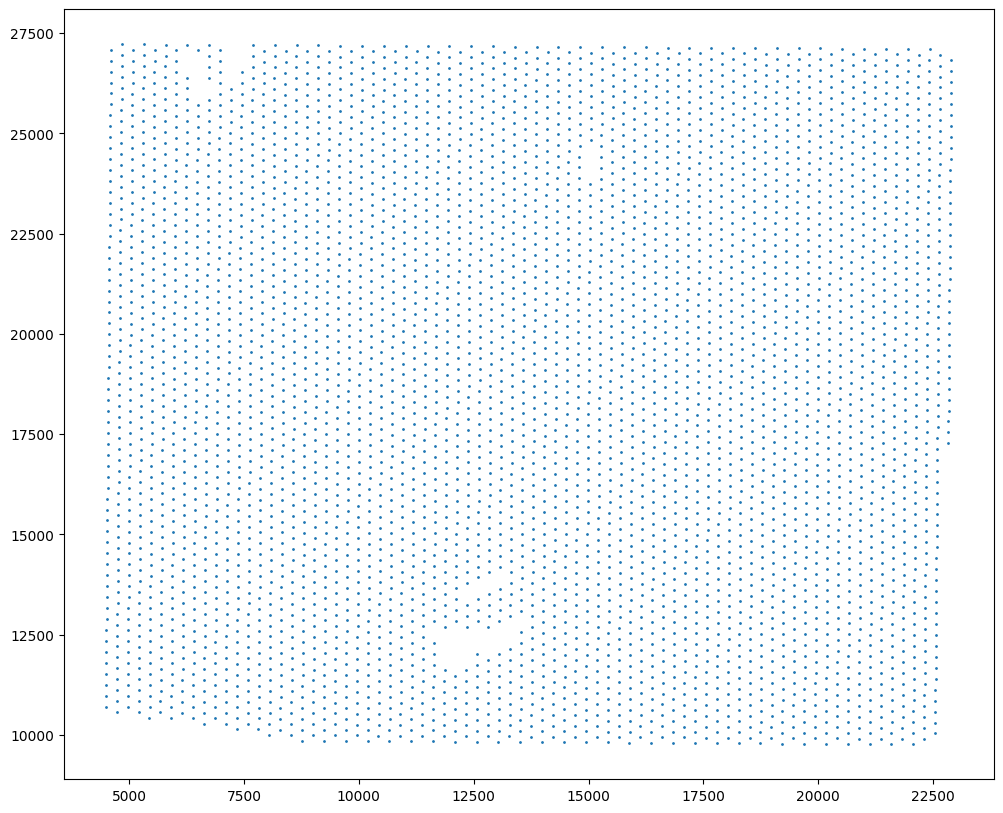

In [5]:
# get cell centroid coordinates
xI = np.array(df_source['imagerow'])
yI = np.array(df_source['imagecol'])

# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=1)

0 of 4895
4894 of 4895


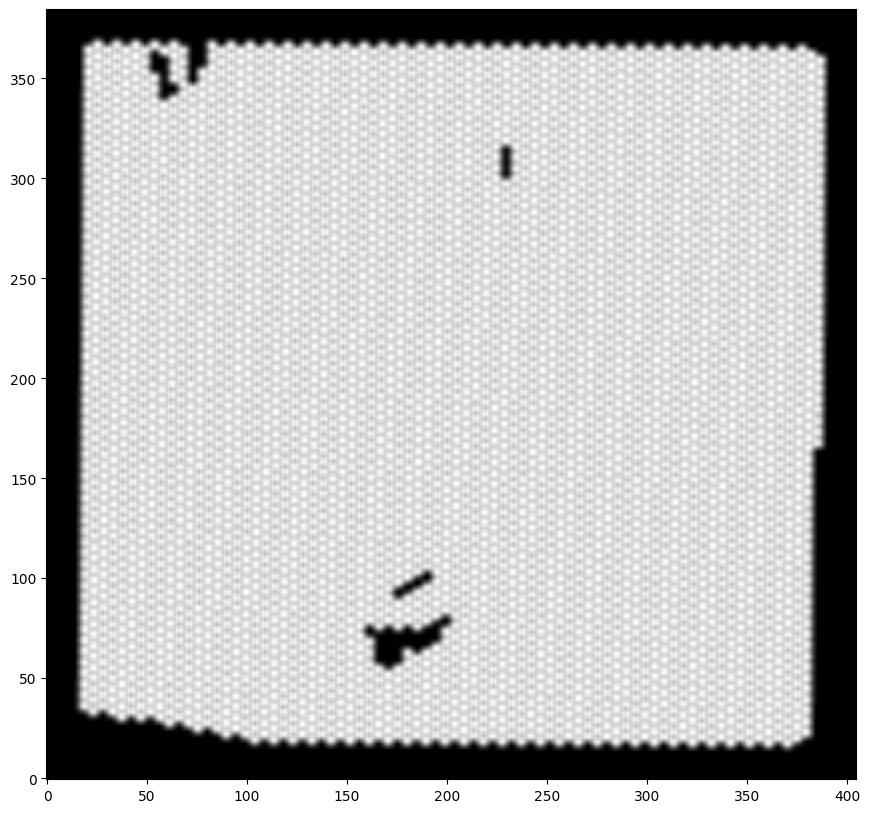

In [12]:
# rasterize at 100um resolution so image looks smooth
XI,YI,I,fig = STalign.rasterize(xI,yI,dx=50)

# plot
ax = fig.axes[0]
ax.invert_yaxis()

## load target dataset

In [ ]:
# # load position file
# df_target = pd.read_csv(input_dir + target_dataset + position_path, header=None)
# print(df_target.head())
# print(len(df_target))

# # import scanpy as sc
# # adata = sc.read_visium(input_dir+target_dataset)
# # df_target = df_source[df_source[0].isin(adata.obs.index.tolist())]
# # df_target = df_target.reset_index(drop=True)
# # del adata
# # print(len(df_target))

In [13]:
adata_target = sc.read_h5ad(input_dir + target_dataset+'.h5ad')
df_target = adata_target.obs.loc[:,['imagerow','imagecol']].astype('float32')
del adata_target
print(df_target.head())
df_target = df_target.dropna()
print(df_target.head())
print(len(df_target))

                    imagerow  imagecol
TACCGATCCAACACTT-1    4510.0   12329.0
GATAAGGGACGATTAG-1    4511.0   12601.0
TGTTGGCTGGCGGAAG-1    4512.0   12872.0
GCGAGGGACTGCTAGA-1    4513.0   13144.0
GCGCGTTTAAATCGTA-1    4514.0   13416.0
                    imagerow  imagecol
TACCGATCCAACACTT-1    4510.0   12329.0
GATAAGGGACGATTAG-1    4511.0   12601.0
TGTTGGCTGGCGGAAG-1    4512.0   12872.0
GCGAGGGACTGCTAGA-1    4513.0   13144.0
GCGCGTTTAAATCGTA-1    4514.0   13416.0
4784


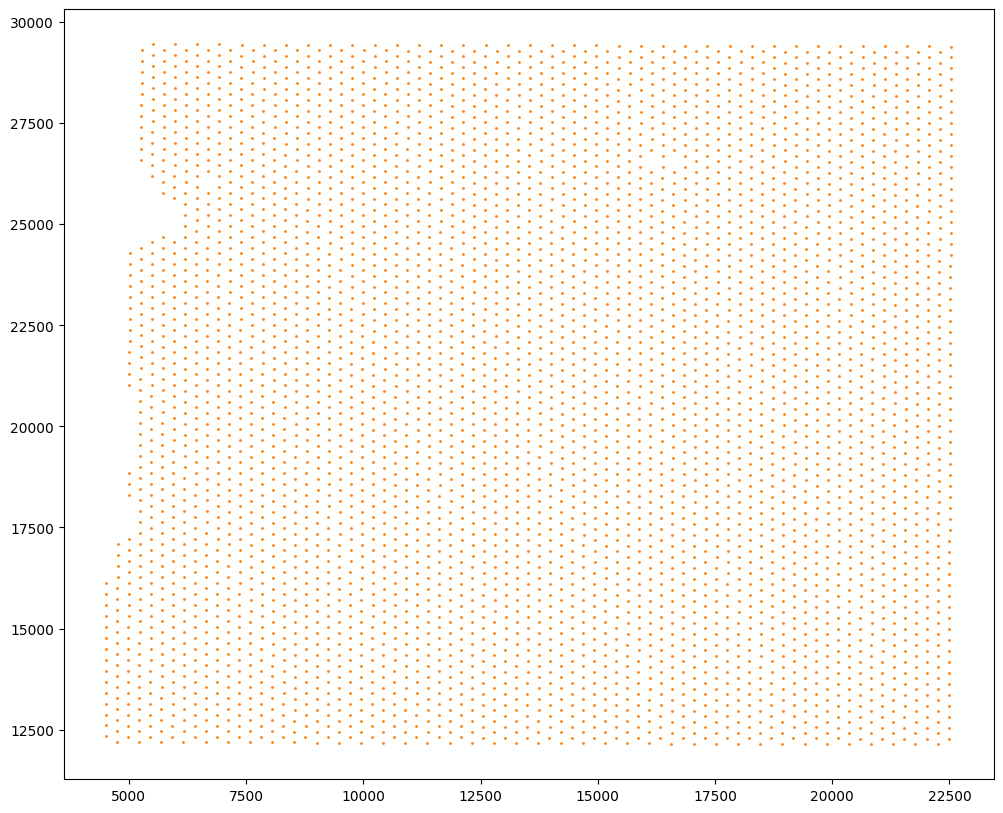

In [14]:
# get cell centroids
xJ = np.array(df_target['imagerow'])
yJ = np.array(df_target['imagecol'])

# plot
fig,ax = plt.subplots()
ax.scatter(xJ,yJ,s=1,alpha=1,c='#ff7f0e')

0 of 4784
4783 of 4784


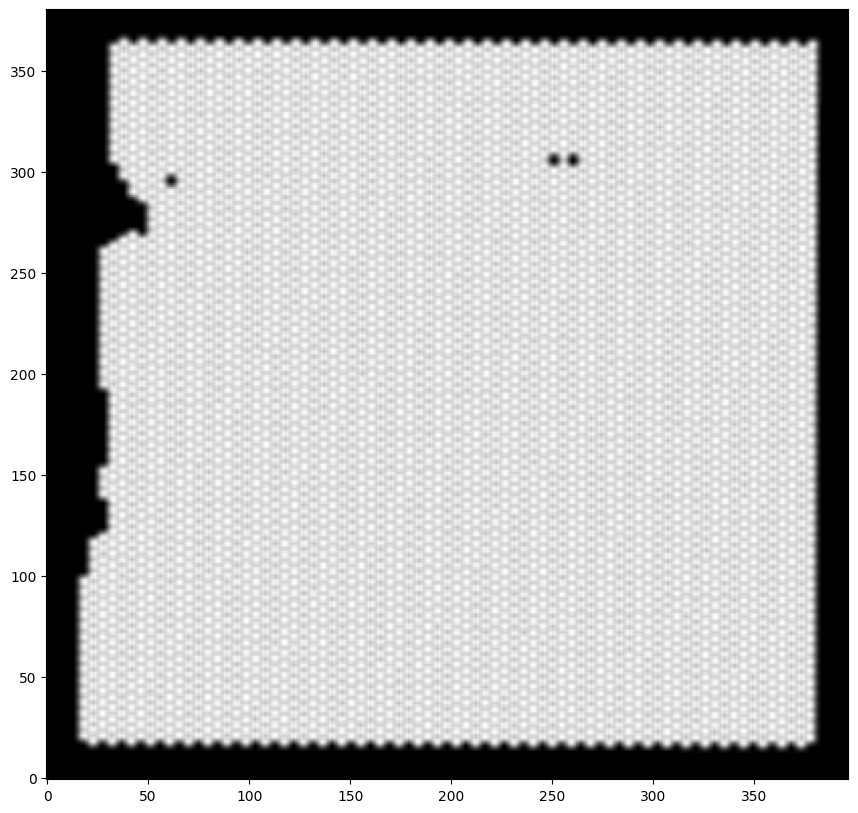

In [15]:
# rasterize and plot
XJ,YJ,J,fig = STalign.rasterize(xJ,yJ,dx=50)
ax = fig.axes[0]
ax.invert_yaxis()

### visualization

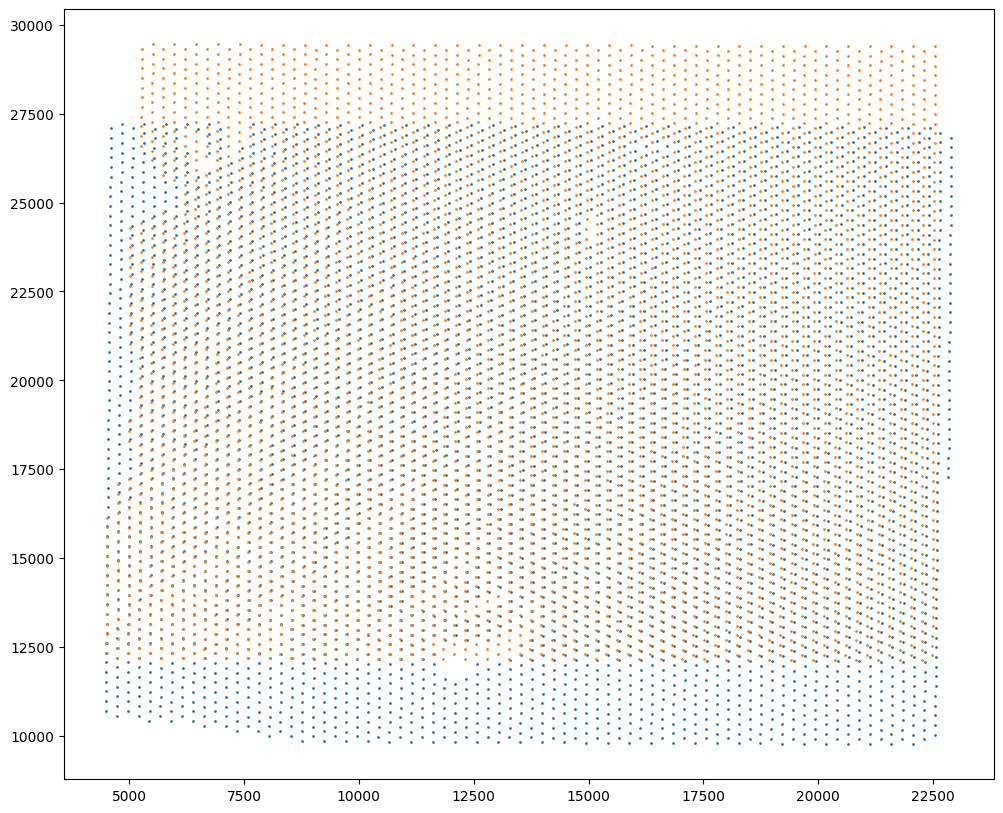

In [16]:
# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=1)
ax.scatter(xJ,yJ,s=1,alpha=1)

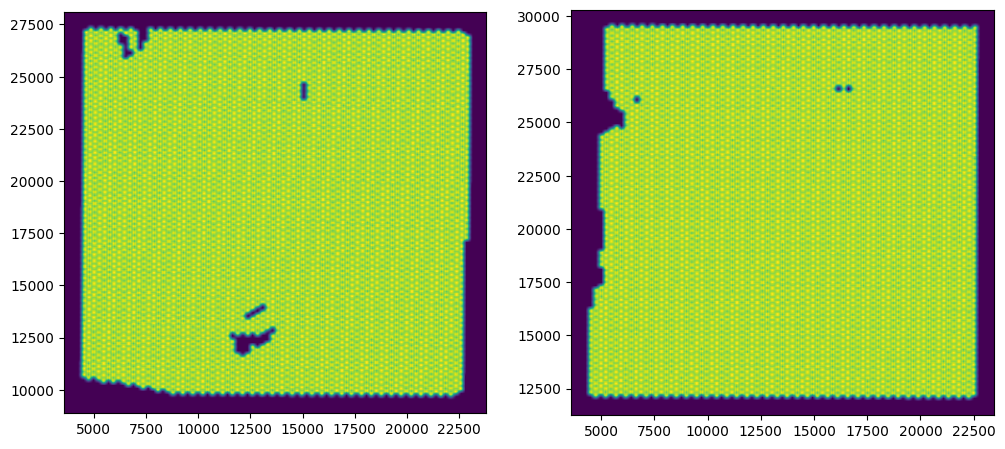

In [17]:
# get extent of images
extentI = STalign.extent_from_x((YI,XI))
extentJ = STalign.extent_from_x((YJ,XJ))

# plot rasterized images
fig,ax = plt.subplots(1,2)
ax[0].imshow((I.transpose(1,2,0).squeeze()), extent=extentI)
ax[1].imshow((J.transpose(1,2,0).squeeze()), extent=extentJ)
ax[0].invert_yaxis()
ax[1].invert_yaxis()

## run STAlign

D:\anaconda\envs\STalign\lib\site-packages\torch\utils\_device.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
D:\anaconda\envs\STalign\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
D:\bio\STalign\STalign-main\STalign\STalign.py:1280: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axE[2].set_yscale('log')


CPU times: total: 23min 15s
Wall time: 10min 6s


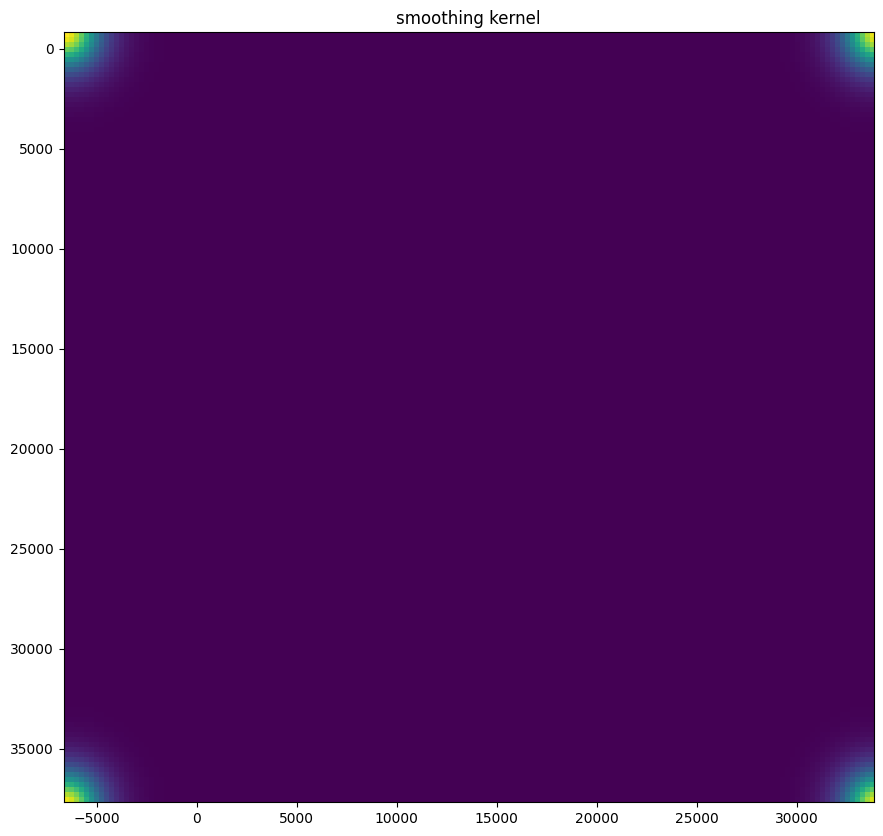

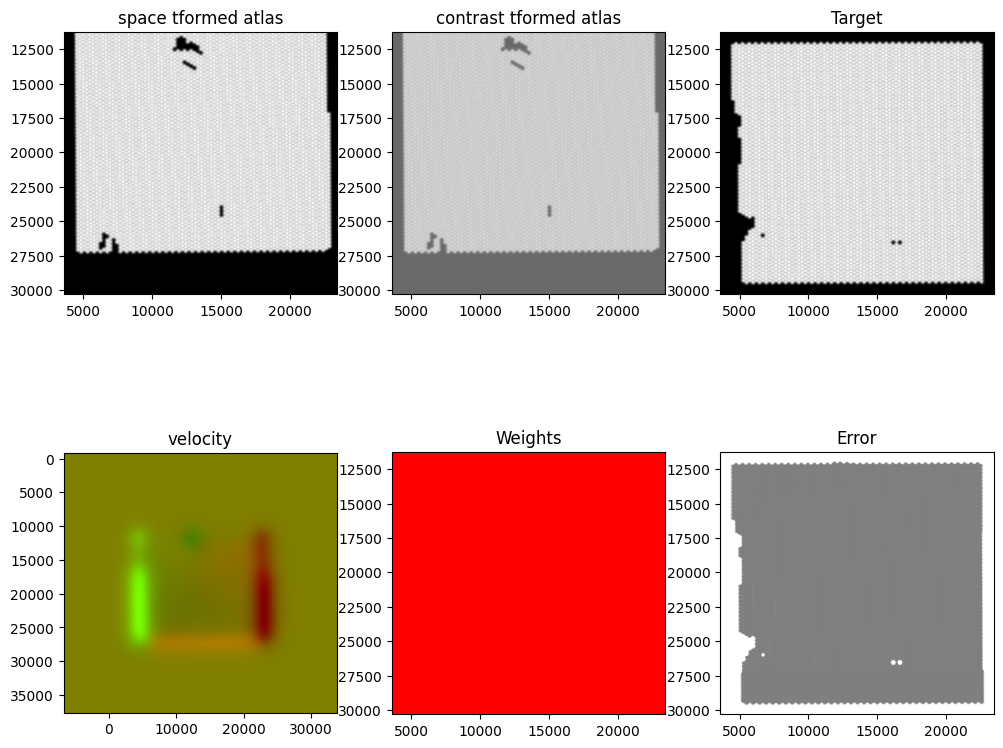

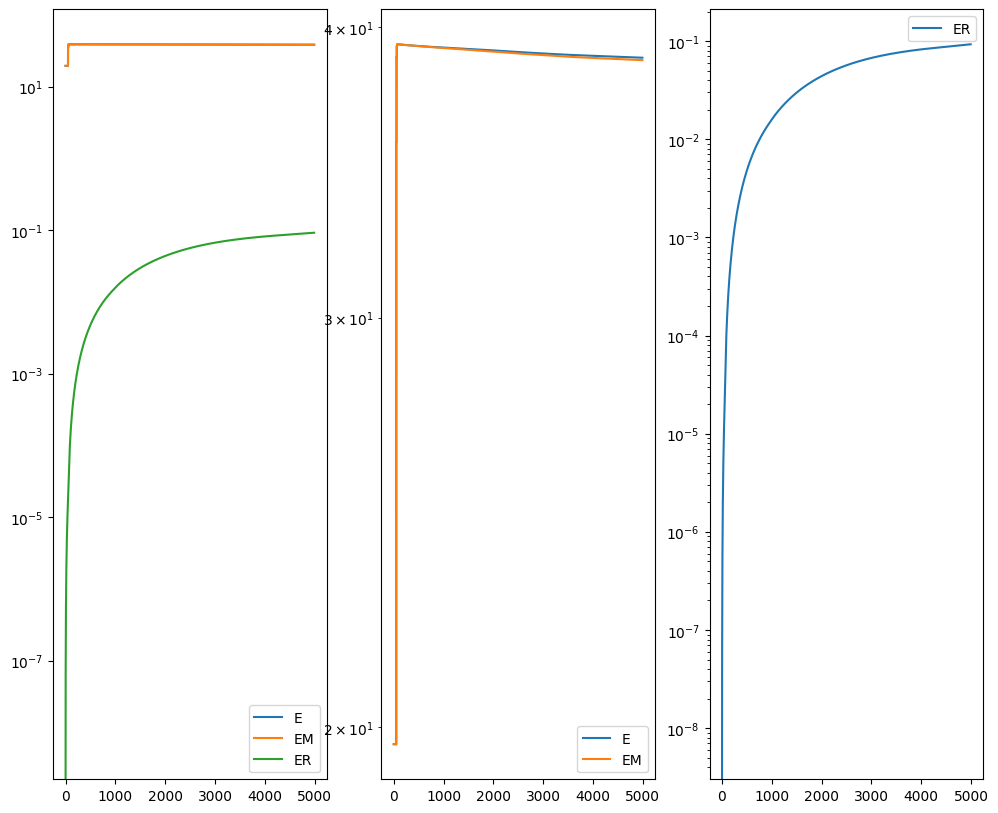

In [19]:
%%time

# run LDDMM
# specify device (default device for STalign.LDDMM is cpu)
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

Ifoo = np.vstack((I, I, I)) # make RGB instead of greyscale
Jfoo = np.vstack((J, J, J)) # make RGB instead of greyscale

out = STalign.LDDMM([YI,XI],Ifoo,[YJ,XJ],Jfoo, dtype=torch.float32,device=device)


# keep all other parameters default
# params = {
#           'niter':1000,
#           'device':device,
#           'diffeo_start':100,
#           'a':250,
#           'epV':1000,
#           'sigmaB':0.1,
#           'muB': torch.tensor([0,0,0]), # black is background in target
#           }

# out = STalign.LDDMM([YI,XI],Ifoo,[YJ,XJ],Jfoo,**params)

In [20]:
# get necessary output variables
A = out['A']
v = out['v']
xv = out['xv']

In [28]:
print(type(xv[0][0]))
print(xv[0].dtype)
print(type(v))
print(type(A))
print(type(YI[0]))
print(type(XI[0]))
print(type(Ifoo[0][0][0]))
print(type(YJ[0]))
print(type(XJ[0]))
print(type(XJ[0]))
print(A)
print(v)
print(xv)

<class 'torch.Tensor'>
torch.float32
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
tensor([[ 1.0001e+00,  2.1484e-04, -9.0864e-03],
        [-6.2471e-04,  9.9811e-01, -3.4050e-01],
        [ 0.0000e+00,  0.0000e+00,  1.0000e+00]], device='cuda:0')
tensor([[[[ 4.5484e-09, -3.3279e-08],
          [ 1.7072e-08, -7.9232e-08],
          [ 1.3514e-08, -1.1390e-07],
          ...,
          [-1.2275e-08,  6.9970e-08],
          [ 1.6694e-08,  4.8881e-08],
          [-2.7276e-09,  4.6591e-09]],

         [[ 8.2094e-09, -3.3294e-08],
          [ 1.9519e-08, -7.9501e-08],
          [ 1.7630e-08, -1.1463e-07],
          ...,
          [-1.0958e-08,  7.0442e-08],
          [ 1.9977e-08,  4.9155e-08],
          [ 1.1876e-09,  4.9385e-09]],

         [[ 1.1607e-08, -3.4841e-08],
          [ 2.1182e-08, -8.0743e-08],
          [ 2.1293e-08, -1.1570e-07],
    

In [22]:
# import importlib
# importlib.reload(STalign)

<module 'STalign.STalign' from 'D:\\bio\\STalign\\STalign-main\\STalign\\STalign.py'>

D:\anaconda\envs\STalign\lib\site-packages\torch\utils\_device.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


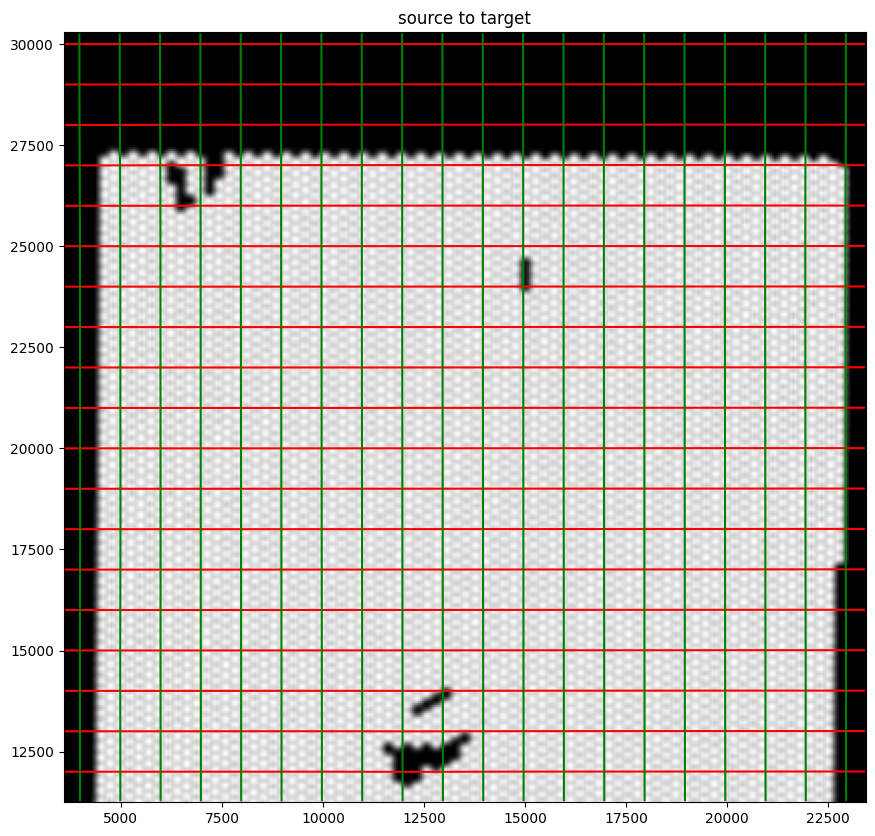

In [29]:
# apply transform
phii = STalign.build_transform(xv,v,A,XJ=[YJ,XJ],direction='b',dtype=torch.float32)
phiI = STalign.transform_image_atlas_to_target(xv,v,A,[YI,XI],Ifoo,[YJ,XJ],dtype=torch.float32)

# plot with grids
fig,ax = plt.subplots()
levels = np.arange(-200000,200000,1000)
if phii.is_cuda:
    ax.contour(XJ,YJ,phii[...,0].cpu(),colors='r',linestyles='-',levels=levels)
    ax.contour(XJ,YJ,phii[...,1].cpu(),colors='g',linestyles='-',levels=levels)
else:
    ax.contour(XJ,YJ,phii[...,0],colors='r',linestyles='-',levels=levels)
    ax.contour(XJ,YJ,phii[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('source to target')
if phiI.is_cuda:
    ax.imshow(phiI.cpu().permute(1,2,0)/torch.max(phiI.cpu()),extent=extentJ)
else:
    ax.imshow(phiI.permute(1,2,0)/torch.max(phiI),extent=extentJ)
ax.invert_yaxis()

In [ ]:
# # transform is invertible
# phi = STalign.build_transform(xv,v,A,XJ=[YI,XI],direction='f')
# phiiJ = STalign.transform_image_target_to_atlas(xv,v,A,[YJ,XJ],Jfoo,[YI,XI])

# # plot with grids
# fig,ax = plt.subplots()
# levels = np.arange(-100000,100000,1000)

# if phi.is_cuda:
#     ax.contour(XJ,YJ,phi[...,0].cpu(),colors='r',linestyles='-',levels=levels)
#     ax.contour(XJ,YJ,phi[...,1].cpu(),colors='g',linestyles='-',levels=levels)
# else:
#     ax.contour(XJ,YJ,phi[...,0],colors='r',linestyles='-',levels=levels)
#     ax.contour(XJ,YJ,phi[...,1],colors='g',linestyles='-',levels=levels)
# # ax.contour(XI,YI,phi[...,0],colors='r',linestyles='-',levels=levels)
# # ax.contour(XI,YI,phi[...,1],colors='g',linestyles='-',levels=levels)
# ax.set_aspect('equal')
# ax.set_title('target to source')
# if phiiJ.is_cuda:
#     ax.imshow(phiiJ.cpu().permute(1,2,0)/torch.max(phiiJ.cpu()),extent=extentI)
# else:
#     ax.imshow(phiiJ.permute(1,2,0)/torch.max(phiiJ),extent=extentI)
# # ax.imshow(phiiJ.permute(1,2,0)/torch.max(phiiJ),extent=extentI)
# ax.invert_yaxis()

In [30]:
# apply transform to original points
tpointsI= STalign.transform_points_atlas_to_target(xv,v,A, np.stack([yI, xI], 1), dtype=torch.float32)

# switch from row column coordinates (y,x) to (x,y)
xI_LDDMM = tpointsI[:,1]
yI_LDDMM = tpointsI[:,0]

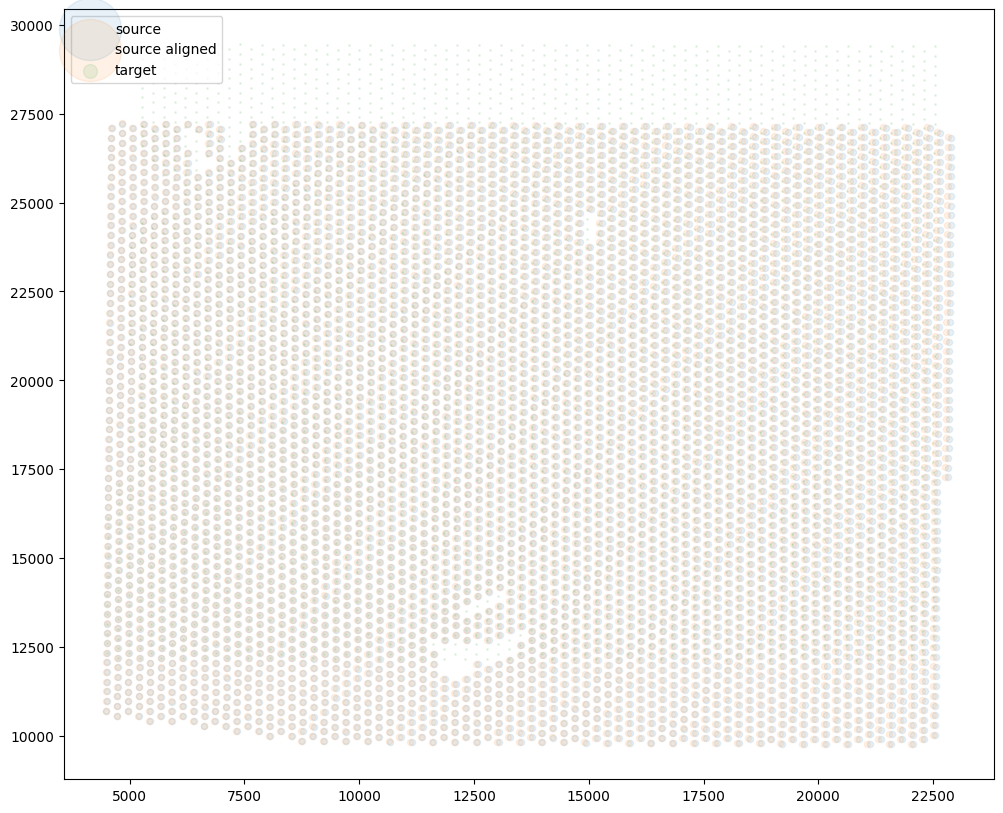

In [31]:
# plot results
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=20,alpha=0.1, label='source')
if tpointsI.is_cuda:
    ax.scatter(xI_LDDMM.cpu(),yI_LDDMM.cpu(),s=20,alpha=0.1, label = 'source aligned')
else:
    ax.scatter(xI_LDDMM,yI_LDDMM,s=20,alpha=0.1, label = 'source aligned')
ax.scatter(xJ,yJ,s=1,alpha=0.1, label='target')
ax.legend(markerscale = 10)

In [34]:
df_source_aligned = pd.DataFrame(
        {
            "aligned_x": xI_LDDMM.cpu(),
            "aligned_y": yI_LDDMM.cpu(),
        }
    )
print(df_source_aligned)

         aligned_x     aligned_y
0      4716.042480  10568.737305
1      4480.870117  10706.681641
2      4718.571777  10841.700195
3      4483.441895  10979.645508
4      4721.097656  11114.653320
...            ...           ...
4890  22586.136719  26427.000000
4891  22824.820312  26561.833984
4892  22589.066406  26700.216797
4893  22827.859375  26834.990234
4894  22592.091797  26973.414062

[4895 rows x 2 columns]


In [35]:
if tpointsI.is_cuda:
    df_source_aligned = pd.DataFrame(
        {
            "aligned_x": xI_LDDMM.cpu(),
            "aligned_y": yI_LDDMM.cpu(),
        }
    )
else:
    df_source_aligned = pd.DataFrame(
        {
            "aligned_x": xI_LDDMM,
            "aligned_y": yI_LDDMM,
        }
    )
results = pd.concat([df_source_aligned], axis=1)
results.head()

# results = pd.concat([df_source, df_source_aligned], axis=1)
# results.head()

,aligned_x,aligned_y
0,4716.042480,10568.737305
1,4480.870117,10706.681641
2,4718.571777,10841.700195
3,4483.441895,10979.645508
4,4721.097656,11114.653320


In [36]:
results.to_csv(output_dir + source_dataset + '_aligned_to_' + target_dataset + '.csv', sep=',')